In [1]:
import tensorflow as tf
import numpy as np
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_x_dim = x_train.shape[1]
input_y_dim = x_train.shape[2]
input_dim = input_x_dim * input_y_dim

x_train = np.reshape(x_train, (len(x_train), input_dim))
x_test = np.reshape(x_test, (len(x_test), input_dim))

hidden_code_dim = 16

In [2]:
from mlp_vae import MLPVariationalAutoEncoder

In [3]:
model = MLPVariationalAutoEncoder(input_dim, hidden_code_dim, [512, 128])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [4]:
history = model.fit(x_train, x_train, batch_size=1024, epochs=120, verbose=1, validation_data=(x_test, x_test), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1205 - val_loss: 0.0631
Epoch 2/120
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0530 - val_loss: 0.0562
Epoch 3/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0447 - val_loss: 0.0526
Epoch 4/120
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0391 - val_loss: 0.0491
Epoch 5/120
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0352 - val_loss: 0.0442
Epoch 6/120
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0321 - val_loss: 0.0428
Epoch 7/120
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0298 - val_loss: 0.0421
Epoch 8/120
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0276 - val_loss: 0.0383
Epoch 9/120
60000/60000 [==============================] - 1s 17us/sample - loss: 0.02

Epoch 76/120
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0126 - val_loss: 0.0248
Epoch 77/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0123 - val_loss: 0.0244
Epoch 78/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0123 - val_loss: 0.0247
Epoch 79/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0121 - val_loss: 0.0253
Epoch 80/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0123 - val_loss: 0.0249
Epoch 81/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0119 - val_loss: 0.0251
Epoch 82/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0123 - val_loss: 0.0254
Epoch 83/120
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0120 - val_loss: 0.0244
Epoch 84/120
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0119 - val_loss: 0.0249
Epoch 85/120
60000/

In [5]:
import matplotlib.pyplot as plt
import random

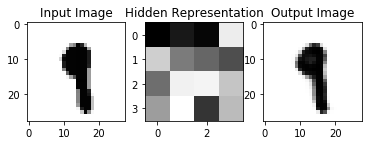

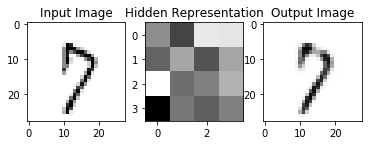

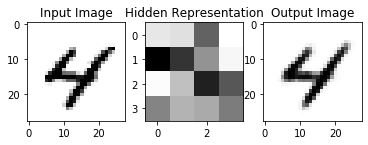

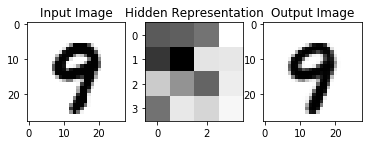

In [6]:
for _ in range(4):
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    test_case = x_test[random.randrange(x_test.shape[0])]
    test_case_img = np.reshape(test_case, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(test_case_img, cmap='Greys')

    plt.subplot(1, 3, 2)
    plt.title("Hidden Representation")
    encoded_dist = model.encode(np.array([test_case]))
    encoded = encoded_dist.sample()
    # The reshape command makes the 16-long hidden code by 4x4
    # so we can see it alongside the input and output
    encoded_img = np.reshape(tf.nn.sigmoid(encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(encoded_img, cmap='Greys')

    plt.subplot(1, 3, 3)
    plt.title("Output Image")
    decoded = model.decode(np.array([encoded]))
    decoded_img = np.reshape(decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(decoded_img, cmap='Greys')

    plt.show()

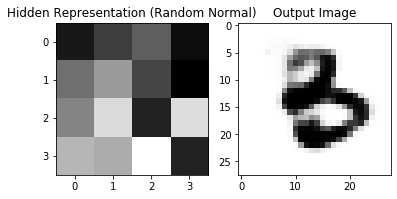

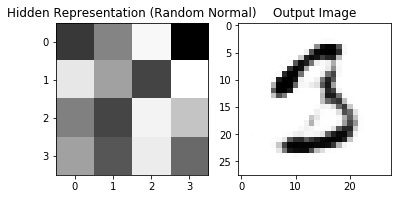

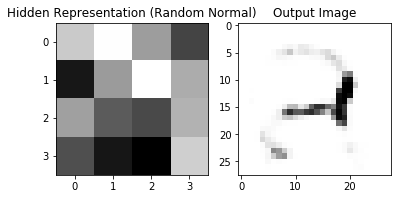

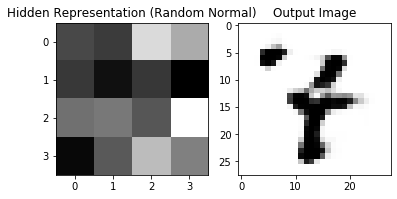

In [7]:
for _ in range(4):
    plt.subplot(1, 2, 1)
    plt.title("Hidden Representation (Random Normal)")
    random_encoded = tf.random.normal((1, 16))
    random_encoded_img = np.reshape(tf.nn.sigmoid(random_encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(random_encoded_img, cmap='Greys')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    random_decoded = model.decode(np.array([random_encoded]))
    random_decoded_img = np.reshape(random_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(random_decoded_img, cmap='Greys')

    plt.show()

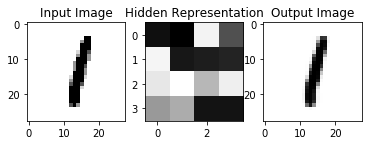

In [8]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_1 = x_test[random.randrange(x_test.shape[0])]
test_case_img_1 = np.reshape(test_case_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_1, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_1 = model.encode(np.array([test_case_1]))
encoded_1 = encoded_dist_1.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_1 = tf.reshape(tf.nn.sigmoid(encoded_1), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_1, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_1 = model.decode(np.array([encoded_1]))
decoded_img_1 = tf.reshape(decoded_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_1, cmap='Greys')

plt.show()

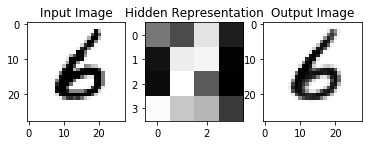

In [29]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_2 = x_test[random.randrange(x_test.shape[0])]
test_case_img_2 = np.reshape(test_case_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_2, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_2 = model.encode(np.array([test_case_2]))
encoded_2 = encoded_dist_2.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_2 = np.reshape(tf.nn.sigmoid(encoded_2), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_2, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_2 = model.decode(np.array([encoded_2]))
decoded_img_2 = np.reshape(decoded_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_2, cmap='Greys')

plt.show()

In [30]:
new_encoded = (encoded_1 + encoded_2) / 2

In [31]:
new_encoded

<tf.Tensor: id=20870, shape=(1, 16), dtype=float32, numpy=
array([[ 1.0519927 ,  1.4580667 , -0.9589772 ,  0.989804  , -0.0149433 ,
         0.3938458 ,  0.24367297,  1.4054799 ,  0.19172832, -1.4833142 ,
         0.17653133,  0.18266118, -0.58720356, -0.23911703,  0.76288205,
         1.2785254 ]], dtype=float32)>

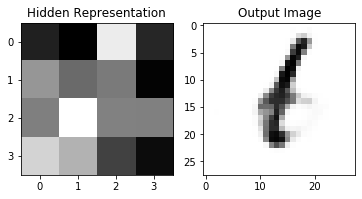

In [32]:
plt.subplot(1, 2, 1)
plt.title("Hidden Representation")
new_encoded_img = np.reshape(tf.nn.sigmoid(new_encoded), (1, 4, 4))[0] * 255.0
plt.imshow(new_encoded_img, cmap='Greys')

plt.subplot(1, 2, 2)
plt.title("Output Image")
new_decoded = model.decode(np.array([new_encoded]))
new_decoded_img = np.reshape(new_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(new_decoded_img, cmap='Greys')

plt.show()

In [13]:
encoded_1

<tf.Tensor: id=19831, shape=(1, 16), dtype=float32, numpy=
array([[ 1.8632755 ,  2.2613893 , -1.1280571 ,  0.95930415, -1.1797143 ,
         1.7217906 ,  1.6142476 ,  1.4861107 , -0.839531  , -1.5617878 ,
        -0.16101095, -1.005139  ,  0.13352756, -0.05177218,  1.7872032 ,
         1.7794333 ]], dtype=float32)>

In [14]:
test_set_encoded = model.encode(x_test)

In [15]:
test_set_encoded

<tfp.distributions.Normal 'Normal' batch_shape=[10000, 16] event_shape=[] dtype=float32>

In [16]:
test_set_encoded[:, 0]

<tfp.distributions.Normal 'Normal' batch_shape=[10000] event_shape=[] dtype=float32>

In [17]:
tf.reduce_mean(test_set_encoded[:, 3].mean())

<tf.Tensor: id=20446, shape=(), dtype=float32, numpy=-0.028663684>

In [18]:
test_set_encoded_sampled = test_set_encoded.sample()

In [19]:
tf.reduce_mean(test_set_encoded_sampled[:, 7])

<tf.Tensor: id=20475, shape=(), dtype=float32, numpy=-0.041789748>

In [20]:
import tensorflow_probability as tfp
emp = tfp.distributions.Empirical(tf.transpose(test_set_encoded_sampled))

In [21]:
tf.reduce_mean(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp.mean(), emp.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=20507, shape=(), dtype=float32, numpy=0.0020239723>

In [22]:
norm = tf.random.normal(test_set_encoded_sampled.shape, 0.0, 1.0)

In [23]:
norm

<tf.Tensor: id=20513, shape=(10000, 16), dtype=float32, numpy=
array([[-0.6463531 ,  0.47916317, -0.8460898 , ...,  0.9141801 ,
        -0.9683516 ,  0.10508562],
       [-0.45667878, -0.36931133,  3.053355  , ...,  1.018265  ,
         0.5380241 , -1.780188  ],
       [ 1.0488578 , -1.2667416 ,  0.16336891, ..., -0.7658942 ,
        -0.38721624, -0.41388145],
       ...,
       [ 0.59839624, -0.99487275, -0.821138  , ...,  1.2027675 ,
        -0.14186327,  0.8298695 ],
       [ 0.18420632, -0.062227  ,  1.1090428 , ...,  1.3534399 ,
        -0.6276417 ,  1.2922534 ],
       [ 0.199602  , -0.77840376,  1.223411  , ..., -1.0561116 ,
        -0.9915867 ,  1.7622739 ]], dtype=float32)>

In [24]:
emp_norm = tfp.distributions.Empirical(tf.transpose(norm))

In [25]:
emp_norm

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [26]:
emp

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [27]:
tf.reduce_sum(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp_norm.mean(), emp_norm.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=20545, shape=(), dtype=float32, numpy=0.002296981>

In [33]:
encoded_2

<tf.Tensor: id=20752, shape=(1, 16), dtype=float32, numpy=
array([[ 0.24070981,  0.65474427, -0.7898974 ,  1.020304  ,  1.1498277 ,
        -0.93409896, -1.1269016 ,  1.3248491 ,  1.2229877 , -1.4048405 ,
         0.5140736 ,  1.3704613 , -1.3079346 , -0.42646188, -0.26143909,
         0.7776176 ]], dtype=float32)>

In [35]:
test_set_encoded_sampled[:, 0]

<tf.Tensor: id=20989, shape=(10000,), dtype=float32, numpy=
array([-0.3785409 ,  0.11625157,  1.7016033 , ...,  0.03083223,
       -1.2421103 , -0.76668805], dtype=float32)>

(array([  3.,   3.,   3.,   3.,  17.,  30.,  42.,  65., 118., 145., 190.,
        194., 246., 242., 267., 257., 254., 283., 290., 285., 277., 315.,
        376., 364., 384., 444., 414., 420., 424., 407., 432., 364., 373.,
        318., 291., 261., 261., 237., 177., 193., 149.,  94.,  42.,  17.,
         14.,   5.,   4.,   3.,   1.,   2.]),
 array([-2.8784957 , -2.7628238 , -2.6471517 , -2.5314798 , -2.4158077 ,
        -2.3001359 , -2.184464  , -2.0687919 , -1.95312   , -1.837448  ,
        -1.721776  , -1.606104  , -1.490432  , -1.3747602 , -1.2590882 ,
        -1.1434162 , -1.0277442 , -0.91207224, -0.79640025, -0.6807283 ,
        -0.5650563 , -0.44938436, -0.3337124 , -0.21804042, -0.10236845,
         0.01330352,  0.12897548,  0.24464746,  0.36031944,  0.4759914 ,
         0.59166336,  0.70733535,  0.8230073 ,  0.9386793 ,  1.0543512 ,
         1.1700232 ,  1.2856952 ,  1.4013672 ,  1.5170391 ,  1.632711  ,
         1.748383  ,  1.864055  ,  1.979727  ,  2.095399  ,  2.211071  ,
 

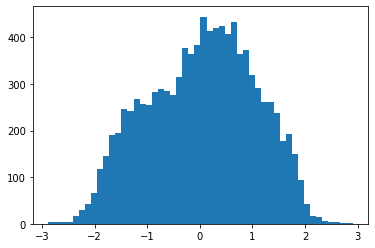

In [38]:
plt.hist(test_set_encoded_sampled[:, 0].numpy(), bins=50)

(array([  1.,   1.,   1.,   5.,   8.,   7.,  12.,  25.,  47.,  44.,  70.,
         71., 113., 138., 156., 218., 258., 270., 319., 336., 314., 360.,
        375., 345., 409., 369., 378., 405., 395., 404., 384., 390., 346.,
        386., 318., 294., 267., 276., 227., 219., 198., 169., 158., 150.,
        114.,  86.,  74.,  47.,  32.,  11.]),
 array([-2.9795043 , -2.8720984 , -2.7646923 , -2.6572864 , -2.5498803 ,
        -2.4424744 , -2.3350682 , -2.2276623 , -2.1202562 , -2.0128503 ,
        -1.9054441 , -1.7980381 , -1.6906321 , -1.5832262 , -1.4758202 ,
        -1.3684142 , -1.2610081 , -1.1536021 , -1.0461961 , -0.9387901 ,
        -0.83138406, -0.72397804, -0.616572  , -0.509166  , -0.40175998,
        -0.29435396, -0.18694794, -0.07954193,  0.02786408,  0.1352701 ,
         0.24267611,  0.35008213,  0.45748815,  0.56489414,  0.67230016,
         0.7797062 ,  0.8871122 ,  0.9945182 ,  1.1019242 ,  1.2093302 ,
         1.3167362 ,  1.4241422 ,  1.5315483 ,  1.6389543 ,  1.7463603 ,
 

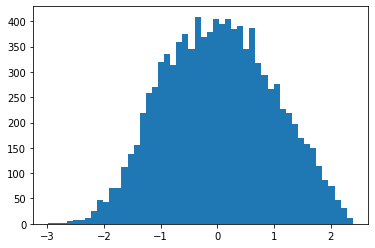

In [39]:
plt.hist(test_set_encoded_sampled[:, 1].numpy(), bins=50)

(array([  2.,   3.,  10.,  11.,  34.,  56., 104., 150., 183., 248., 269.,
        300., 307., 320., 340., 370., 347., 368., 370., 446., 424., 408.,
        390., 413., 374., 399., 382., 351., 340., 314., 274., 274., 238.,
        210., 209., 168., 147., 109.,  77.,  76.,  56.,  40.,  30.,  24.,
         11.,   7.,   7.,   4.,   3.,   3.]),
 array([-2.4732904 , -2.3569827 , -2.2406752 , -2.1243675 , -2.00806   ,
        -1.8917522 , -1.7754446 , -1.659137  , -1.5428294 , -1.4265218 ,
        -1.310214  , -1.1939064 , -1.0775988 , -0.9612912 , -0.8449836 ,
        -0.7286759 , -0.6123683 , -0.49606064, -0.379753  , -0.26344538,
        -0.14713773, -0.0308301 ,  0.08547753,  0.20178516,  0.3180928 ,
         0.43440044,  0.55070806,  0.66701573,  0.78332335,  0.89963096,
         1.0159386 ,  1.1322463 ,  1.2485539 ,  1.3648615 ,  1.4811691 ,
         1.5974768 ,  1.7137845 ,  1.8300921 ,  1.9463997 ,  2.0627074 ,
         2.179015  ,  2.2953227 ,  2.4116302 ,  2.527938  ,  2.6442456 ,
 

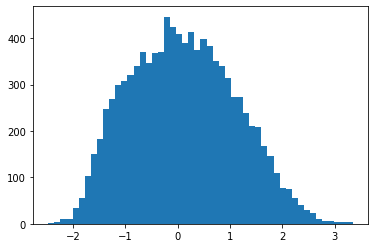

In [40]:
plt.hist(test_set_encoded_sampled[:, 2].numpy(), bins=50)

(array([  30.,  386., 1278., 1659., 1641., 1952., 1756., 1058.,  222.,
          18.]),
 array([-2.7388341 , -2.1868944 , -1.6349549 , -1.0830152 , -0.5310756 ,
         0.02086401,  0.5728036 ,  1.1247432 ,  1.676683  ,  2.2286224 ,
         2.7805622 ], dtype=float32),
 <a list of 10 Patch objects>)

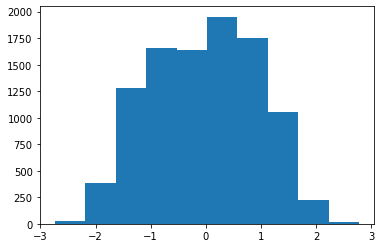

In [43]:
plt.hist(test_set_encoded_sampled[:, 3].numpy(), bins=10)